# **주제**

딥러닝을 사용하여 CAPTCHA 이미지 인식

### **CAPTCHA** 


*   기계는 인식할 수 없으나 사람은 쉽게 인식할 수 있는 텍스트, 이미지를 통해 사람과 기계를 구별하는 프로그램

### **주제 선정 이유** 


*   인터파크에서 뮤지컬 티켓을 구매하다가 캡차를 보고 딥러닝을 통해 풀 수 있지 않을까 해서 주제로 선정하고 프로젝트를 진행




In [1]:
!nvidia-smi

Fri Feb 25 02:45:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------



```
import pyautogui as pag
x, y = pag.position()
print(x, y)
```





```
import time
a = 500
while a>0:                           #클릭매크로를 이용해 데이터 수집
    pag.click(1379, 212)
    time.sleep(0.5)
    pag.doubleClick(1833, 128)
    pag.hotkey('ctrl','c')
    pag.click(1417, 39)
    pag.hotkey('ctrl','v')
    pag.press('enter')
    time.sleep(0.5)
    pag.hotkey('ctrl','s')
    time.sleep(1)
    pag.click(1142, 470)
    time.sleep(0.5)
    pag.click(1155, 505)
    pag.click(1281, 443)
    time.sleep(0.5)
    pag.click(1281, 443)
    pag.typewrite(f'{500-a}.jpg')
    pag.click(1759, 515)
    time.sleep(0.5)
    pag.click(1600, 37)
    a -= 1
```



In [2]:
import os
import cv2
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model

# **데이터셋**

In [3]:
!unzip -q capt.zip -d capt

In [4]:
img_list = glob('capt/*')

print('총 이미지 수:', len(img_list))

총 이미지 수: 500


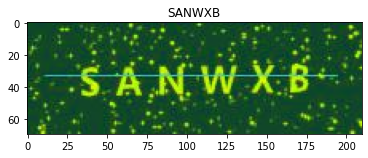

In [5]:
img = cv2.imread(img_list[0])                                    # 샘플 이미지
label = os.path.splitext(os.path.basename(img_list[0]))[0]       # 파일명으로 label 생성

plt.title(label)
plt.imshow(img)

Text(0.5, 1.0, 'original')

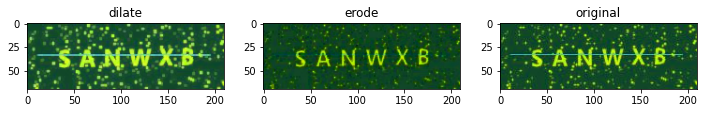

In [6]:
kernel = np.ones((2,2), np.uint8)
fig = plt.figure(figsize=(12, 16))
dilate = cv2.dilate(img, kernel, iterations = 1)
erode = cv2.erode(img, kernel, iterations = 1)

ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(dilate)                                               # 팽창 
plt.title("dilate")                         
 
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(erode)                                                # 침식
plt.title("erode")

ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(img)
plt.title("original")

In [7]:
for i in img_list:
  original = cv2.imread(i)
  eroded = cv2.erode(original, kernel, iterations = 1)
  filename = 'eroded/' + os.path.splitext(os.path.basename(i))[0] + '.jpg'
  cv2.imwrite(filename, eroded)                                  # imwrite를 활용해 저장

총 이미지 수: 500


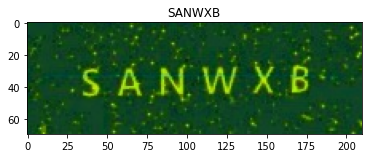

In [8]:
img_list = glob('eroded/*')                                      # 잘 저장되었는지 테스트
print(f'총 이미지 수: {len(img_list)}')

img = cv2.imread(img_list[0])

label = os.path.splitext(os.path.basename(img_list[0]))[0]

plt.title(label)
plt.imshow(img)

# **전처리**

In [9]:
imgs = []
labels = []
unique_ch = set()

for img_path in img_list:
  imgs.append(img_path)                                          # 이미지 경로 저장

  label = os.path.splitext(os.path.basename(img_path))[0]
  labels.append(label)                                           # label 저장

  for ch in label:
    unique_ch.add(ch)                                            # set에 저장 > unique한 값만 저장
    
print(len(imgs), len(labels))

500 500


In [10]:
print("라벨에 존재하는 캐릭터 개수:", len(unique_ch))
unique_ch

라벨에 존재하는 캐릭터 개수: 20


{'A',
 'B',
 'C',
 'D',
 'E',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'W',
 'X',
 'Z'}

# **이미지 분할**

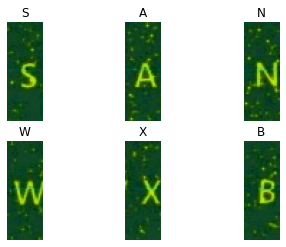

In [11]:
sample = img_list[0]
original = cv2.imread(str(sample))
label = os.path.splitext(os.path.basename(sample))[0]

fig = plt.figure()
crop_img1 = original[0:70,25:50]
crop_img2 = original[0:70,50:75]
crop_img3 = original[0:70,75:100]
crop_img4 = original[0:70,105:130]
crop_img5 = original[0:70,130:155]
crop_img6 = original[0:70,155:180]

ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(crop_img1)
plt.title(label[0])
ax1.axis("off")
 
ax2 = fig.add_subplot(2, 3, 2)
ax2.imshow(crop_img2)
plt.title(label[1])
ax2.axis("off")

ax3 = fig.add_subplot(2, 3, 3)
ax3.imshow(crop_img3)
plt.title(label[2])
ax3.axis("off")

ax4 = fig.add_subplot(2, 3, 4)
ax4.imshow(crop_img4)
plt.title(label[3])
ax4.axis("off")

ax5 = fig.add_subplot(2, 3, 5)
ax5.imshow(crop_img5)
plt.title(label[4])
ax5.axis("off")

ax6 = fig.add_subplot(2, 3, 6)
ax6.imshow(crop_img6)
plt.title(label[5])
ax6.axis("off")

plt.show()

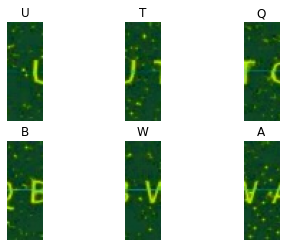

In [12]:
sample = img_list[5]                                      
original = cv2.imread(str(sample))
label = os.path.splitext(os.path.basename(sample))[0]

fig = plt.figure()
crop_img1 = original[0:70,25:50]
crop_img2 = original[0:70,50:75]
crop_img3 = original[0:70,75:100]
crop_img4 = original[0:70,105:130]
crop_img5 = original[0:70,130:155]
crop_img6 = original[0:70,155:180]

ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(crop_img1)
plt.title(label[0])
ax1.axis("off")
 
ax2 = fig.add_subplot(2, 3, 2)
ax2.imshow(crop_img2)
plt.title(label[1])
ax2.axis("off")

ax3 = fig.add_subplot(2, 3, 3)
ax3.imshow(crop_img3)
plt.title(label[2])
ax3.axis("off")

ax4 = fig.add_subplot(2, 3, 4)
ax4.imshow(crop_img4)
plt.title(label[3])
ax4.axis("off")

ax5 = fig.add_subplot(2, 3, 5)
ax5.imshow(crop_img5)
plt.title(label[4])
ax5.axis("off")

ax6 = fig.add_subplot(2, 3, 6)
ax6.imshow(crop_img6)
plt.title(label[5])
ax6.axis("off")

plt.show()

### 한글자씩 잘라서 학습시키려 하였으나 글자 간격이 일정하지 않은 문제 발생


### CTC를 사용해서 진행하는 것으로 변경
※ CTC란? 입력 음성 프레임 시퀀스와 타겟 단어/음소 시퀀스 간에 명시적인 얼라인먼트(alignment) 정보 없이도 음성 인식 모델을 학습할 수 있는 기법, Unsegmented data의 학습을 위해 사용한다.

In [13]:
# 학습을 위해 label을 숫자로 변경
# StringLookup - 문자열 피쳐를 정수 인덱스에 매핑하는 레이어

char_to_num = layers.experimental.preprocessing.StringLookup(
    vocabulary=list(unique_ch), num_oov_indices=0, mask_token=None
)

num_to_char = layers.experimental.preprocessing.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), num_oov_indices=0, mask_token=None, invert=True
)

print(labels[0])
encoded = char_to_num(tf.strings.unicode_split(labels[0], input_encoding='UTF-8'))
print(encoded)

/usr/local/lib/python3.7/dist-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


SANWXB
tf.Tensor([ 5 13 11  7 19 12], shape=(6,), dtype=int64)


In [14]:
tf.strings.reduce_join(num_to_char(encoded)).numpy().decode('utf-8')

'SANWXB'

In [15]:
from sklearn.model_selection import train_test_split

# test size를 전체의 10%로 정하고 split 함
x_train, x_val, y_train, y_val = train_test_split(imgs, labels, test_size=0.1, random_state=42)

print(len(x_train), len(y_train))
print(len(x_val), len(y_val))

450 450
50 50


# **데이터 변환**

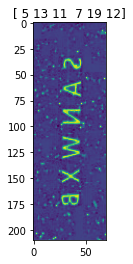

In [16]:
# 이미지를 모델에 넣을 때는 세로로 넣기 위해 변환
img_width = 210
img_height = 70

def encode_single_sample(img_path, label):
  img = tf.io.read_file(img_path)

  # grayscale로 변환
  img = tf.io.decode_png(img, channels=1)

  img = tf.image.convert_image_dtype(img, tf.float32)

  img = tf.image.resize(img, [img_height, img_width])

  # [0, 1, 2] > [1, 0, 2]
  # 첫번째 축과 두번째 축을 바꿈 > 세로로 변환
  img = tf.transpose(img, perm=[1, 0, 2])

  # 라벨 인코딩
  label = char_to_num(tf.strings.unicode_split(label, input_encoding='UTF-8'))

  # 이미지와 라벨이 있는 딕셔너리 형태로 반환
  return {'image': img, 'label': label}

sample = encode_single_sample(imgs[0], labels[0])               # 테스트

plt.title(str(sample['label'].numpy()))
plt.imshow(sample['image'].numpy().squeeze())

In [17]:
batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (
    train_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
)

validation_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
validation_dataset = (
    validation_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
)

print(train_dataset)
print(validation_dataset)

<PrefetchDataset element_spec={'image': TensorSpec(shape=(None, 210, 70, 1), dtype=tf.float32, name=None), 'label': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}>
<PrefetchDataset element_spec={'image': TensorSpec(shape=(None, 210, 70, 1), dtype=tf.float32, name=None), 'label': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}>


# **모델 생성**

In [18]:
# CTC Loss

class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        batch_len = tf.cast(tf.shape(y_true)[0], dtype='int64')
        input_length = tf.cast(tf.shape(y_pred)[1], dtype='int64')
        label_length = tf.cast(tf.shape(y_true)[1], dtype='int64')

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype='int64')
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype='int64')

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        return y_pred


In [19]:
def build_model():
    # Input Layer
    input_img = layers.Input(
        shape=(img_width, img_height, 1), name='image', dtype='float32'
    )
    labels = layers.Input(name='label', shape=(6,), dtype='float32')

    # CNN
    x = layers.Conv2D(
        32,
        (3, 3),
        activation='relu',
        kernel_initializer='he_normal',
        padding='same',
        name='Conv1',
    )(input_img)
    x = layers.MaxPooling2D((2, 2), name='pool1')(x)

    x = layers.Conv2D(
        64,
        (3, 3),
        activation='relu',
        kernel_initializer='he_normal',
        padding='same',
        name='Conv2',
    )(x)
    x = layers.MaxPooling2D((2, 2), name='pool2')(x)

    # stride가 2인 max pooling을 2번 했으므로 차원이 4배 줄어듦
    # 두번째 conv에서 64개의 필터 사용
    new_shape = ((img_width // 4), (img_height // 4) * 64)
    x = layers.Reshape(target_shape=new_shape, name='reshape')(x)
    x = layers.Dense(64, activation='relu', name='dense1')(x)
    x = layers.Dropout(0.2)(x)

    # RNN
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

    # Output Layer
    x = layers.Dense(
        len(char_to_num.get_vocabulary()) + 1, activation='softmax', name='dense2'       # Unkown 값을 대비해서 1을 더해준다.
    )(x)

    # CTC Layer
    output = CTCLayer(name='ctc_loss')(labels, x)


    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name='captcha'
    )
    opt = keras.optimizers.Adam()
    model.compile(optimizer=opt)
    
    return model

model = build_model()
model.summary()

Model: "captcha"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 210, 70, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 Conv1 (Conv2D)                 (None, 210, 70, 32)  320         ['image[0][0]']                  
                                                                                                  
 pool1 (MaxPooling2D)           (None, 105, 35, 32)  0           ['Conv1[0][0]']                  
                                                                                                  
 Conv2 (Conv2D)                 (None, 105, 35, 64)  18496       ['pool1[0][0]']            

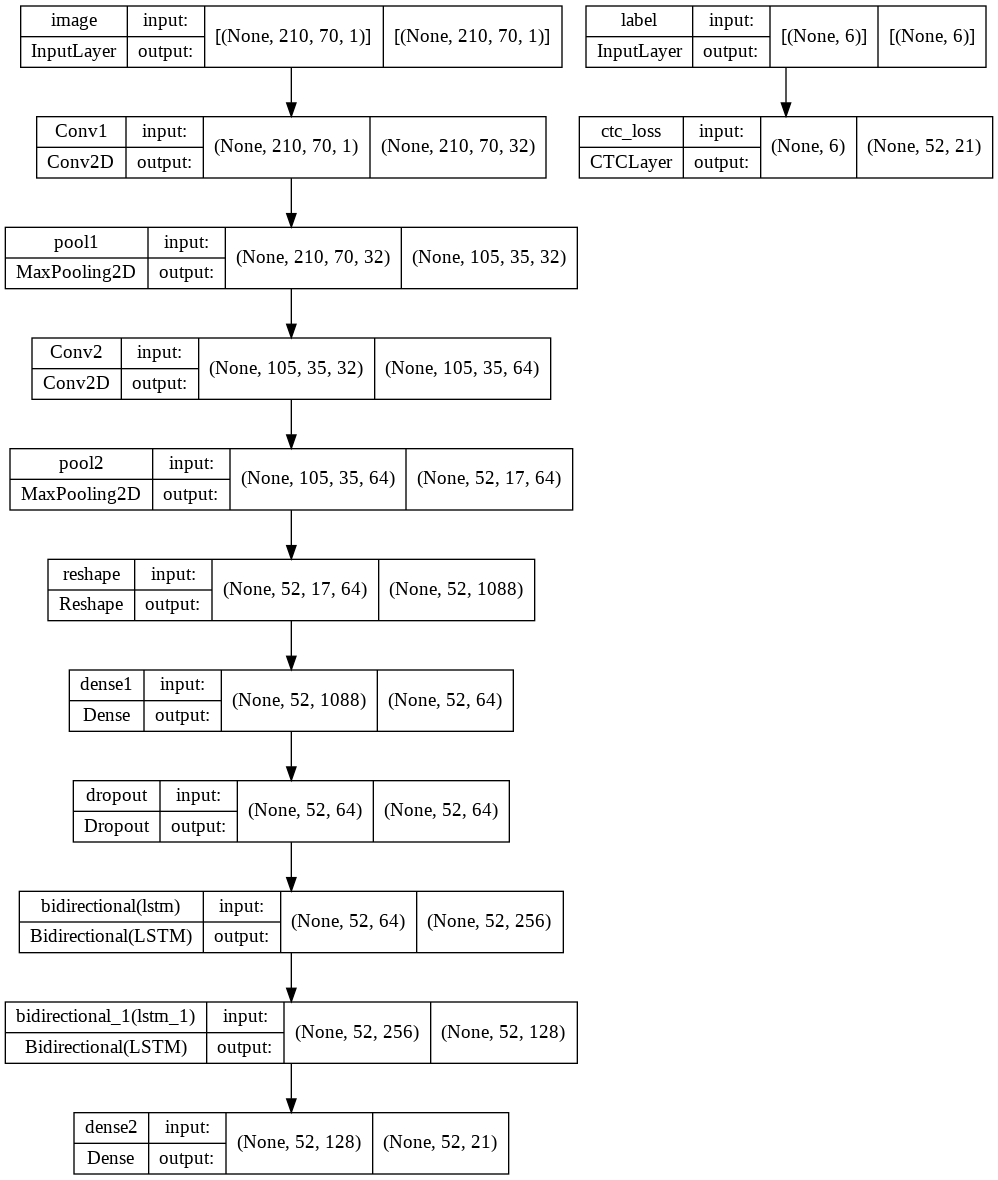

In [20]:
# 모델 시각화
tf.keras.utils.plot_model(
model, to_file='model.png', show_shapes=True,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

# **학습**

In [21]:
es = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=20, restore_best_weights=True
) 

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=100,
    callbacks=[es],
)

Epoch 1/100
15/15 [==============================] - 23s 271ms/step - loss: 36.8139 - val_loss: 19.7873
Epoch 2/100
15/15 [==============================] - 2s 126ms/step - loss: 19.6300 - val_loss: 19.5613
Epoch 3/100
15/15 [==============================] - 2s 124ms/step - loss: 19.3201 - val_loss: 19.2420
Epoch 4/100
15/15 [==============================] - 2s 125ms/step - loss: 19.1920 - val_loss: 19.2181
Epoch 5/100
15/15 [==============================] - 2s 125ms/step - loss: 19.1606 - val_loss: 19.1995
Epoch 6/100
15/15 [==============================] - 2s 127ms/step - loss: 19.1498 - val_loss: 19.1760
Epoch 7/100
15/15 [==============================] - 2s 128ms/step - loss: 19.1417 - val_loss: 19.1696
Epoch 8/100
15/15 [==============================] - 2s 125ms/step - loss: 19.1352 - val_loss: 19.1653
Epoch 9/100
15/15 [==============================] - 2s 127ms/step - loss: 19.1213 - val_loss: 19.1654
Epoch 10/100
15/15 [==============================] - 2s 127ms/step - lo

# **예측 결과**

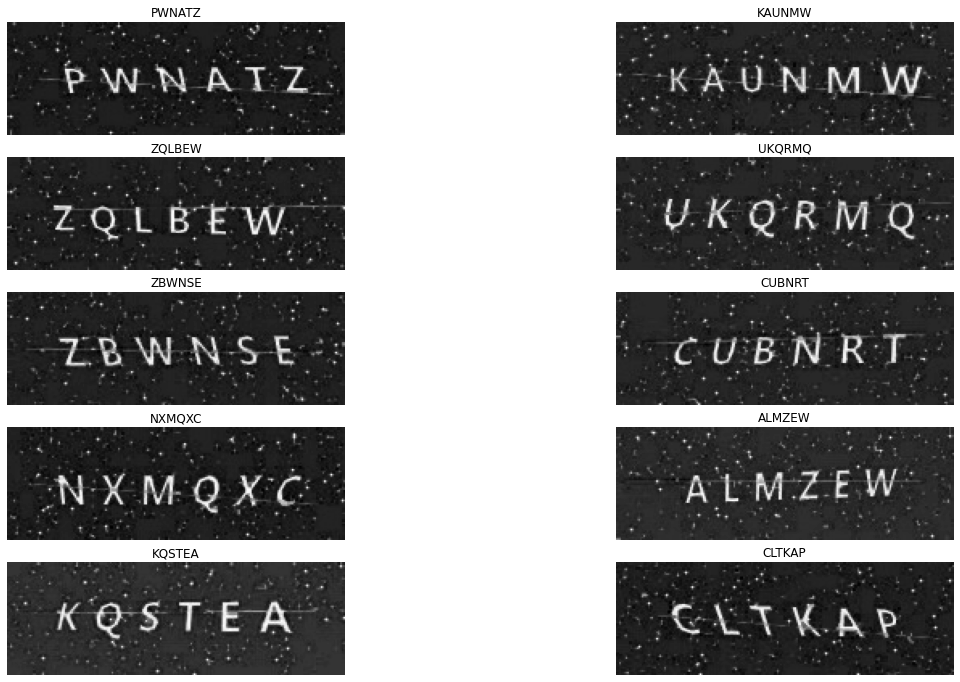

In [22]:
pred_model = keras.models.Model(
  model.get_layer(name='image').input, model.get_layer(name='dense2').output
)

# 예측값 디코딩
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :6
    ]
    output_text = []
    for res in results:
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode('utf-8')           # 라벨 디코딩
        output_text.append(res)
    return output_text

for batch in validation_dataset.take(1):
    batch_images = batch['image']
    preds = pred_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    _, axes = plt.subplots(5, 2, figsize=(20, 12))                                        # 10개의 데이터를 시각화

    for img, text, ax in zip(batch_images, pred_texts, axes.flatten()):
        img = img.numpy().squeeze()
        img = img.T                                                                       # 이미지를 세로로 변환해서 넣었기 때문에 다시 transpose

        ax.imshow(img, cmap='gray')
        ax.set_title(text)                                                                # 예측 값을 타이틀로 지정
        ax.set_axis_off()

# **기대 효과**
인터넷을 사용하다보면 티켓을 구매할 때 뿐 아니라 여러 곳에서 캡차를 만날 수 있는데 프로젝트를 발전시켜서 프로그램을 만들면 편하게 사용할 수 있을 것이다.

# **보완할 점**

전이학습이나 처음 시도했던 이미지를 잘라서 학습시키는 방법을 구현해서 성능 비교